About this file
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Dataset can be used for Binary Classification sample problems

Class 0 is for Authentic notes and Class 1 is for Fake notes

Objective: Build a classification model that can predict the authenticity of banknotes and deploy it using Docker

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly
import plotly.express as px

In [2]:
df = pd.read_csv('/content/BankNote_Authentication.csv')

In [3]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df.isnull().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

In [21]:
def target_count(data, target):
    trace = go.Bar( x = data[target].value_counts().values.tolist(), 
                    y = [0, 1], 
                    orientation = 'h', 
                    text=data[target].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['green','red'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title = 'Count of Class (green = authentic notes, red = fake notes)')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)
    

#------------PERCENTAGE-------------------
def target_percent(data, target):
    trace = go.Pie(labels = [0, 1], values = data[target].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['green','red'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title = 'Distribution of Class')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [22]:
target_count(df, 'class')
target_percent(df, 'class')

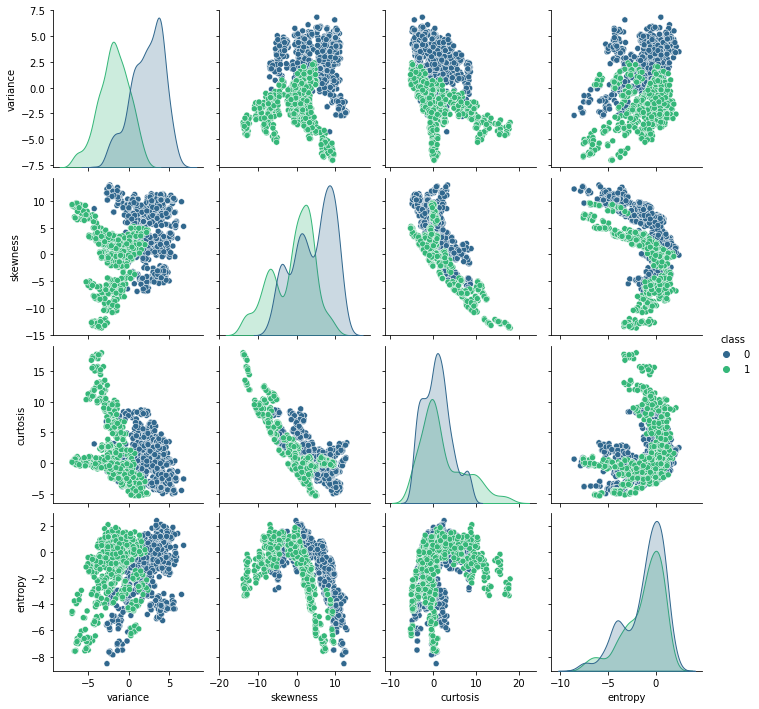

In [23]:
sns.pairplot(df, hue="class", palette="viridis")

In [24]:
features = [i for i in df.columns]

In [25]:
D = df[(df['class'] != 0)]
H = df[(df['class'] == 0)]

In [30]:
def plot_distribution(data_select, size_bin) :  
    
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['fake notes', 'authentic notes']
    colors = ['#00FA9A', '#2F4F4F']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, 
                             bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig)

In [31]:
def plot_outliers(df, feat):
    
    trace0 = go.Box(
        y = df[feat],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(32,178,170)'),
        line = dict(
            color = 'rgb(32,178,170)')
    )

    trace1 = go.Box(
        y = df[feat],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(0,128,128)'),
        line = dict(
            color = 'rgb(0,128,128)')
    )

    trace2 = go.Box(
        y = df[feat],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(0,250,154)',
            outliercolor = '#FF69B4',
            line = dict(
                outliercolor = '#FF69B4',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(0,250,154)')
    )

    trace3 = go.Box(
        y = df[feat],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(47,79,79)'),
        line = dict(
            color = 'rgb(47,79,79)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(feat)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [32]:
def plot_all_feature():
    for feat in features[:-1]:
        plot_distribution(feat, 0)
        plot_outliers(df, feat)
    plot_outliers(df, features[-1])

In [33]:
plot_all_feature()

In [34]:
X = df.drop('class',axis=1)
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [35]:
y = df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [75]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1097, 4)
y_train: (1097,)
X_test: (275, 4)
y_test: (275,)


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc_classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=1)
rfc_classifier.fit(X_train, y_train)

rfc_accuracies = cross_val_score(estimator=rfc_classifier, X=X_train, y=y_train, cv=10)

print("Accuracies:\n ", rfc_accuracies)

Accuracies:
  [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [77]:
print("Mean Accuracy:",rfc_accuracies.mean())

Mean Accuracy: 0.9927272727272728


In [78]:
rfc_classifier_pred = rfc_classifier.predict(X_test)
rfc_classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

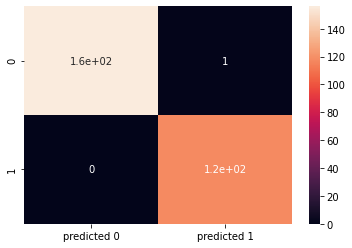

In [79]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,rfc_classifier_pred,labels=[0,1])

df_cm = pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['predicted 0','predicted 1']])

sns.heatmap(df_cm, annot=True)

In [80]:
joblib.dump(rfc_classifier, "rdf_classifier")

['rdf_classifier']

In [83]:
rfc_classifier.predict([[-2.54190,-0.65804,2.684200,1.19520]])

array([1])